In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c882bdc25dc170ba45629f859358a2f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yeppoon
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | pompeu
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | biloxi
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | rikitea
Proc

Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | dubrovka
Processing Record 41 of Set 4 | soe
Processing Record 42 of Set 4 | chara
Processing Record 43 of Set 4 | goderich
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | sarhari
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | santa cruz
Processing Record 1 of Set 5 | puerto escondido
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | mweka
Processing Record 6 of Set 5 | bekhtery
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | zhigansk
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | los llanos de aridane
Processing Record 11 of Set 5 

Processing Record 27 of Set 8 | teknaf
Processing Record 28 of Set 8 | agadez
Processing Record 29 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 8 | tucumcari
Processing Record 31 of Set 8 | makakilo city
Processing Record 32 of Set 8 | quatre cocos
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | yakeshi
Processing Record 35 of Set 8 | tamandare
Processing Record 36 of Set 8 | nikitinskiy
Processing Record 37 of Set 8 | severo-yeniseyskiy
Processing Record 38 of Set 8 | turukhansk
Processing Record 39 of Set 8 | pochutla
Processing Record 40 of Set 8 | asfi
Processing Record 41 of Set 8 | yian
City not found. Skipping...
Processing Record 42 of Set 8 | batticaloa
Processing Record 43 of Set 8 | fuxin
Processing Record 44 of Set 8 | gusau
Processing Record 45 of Set 8 | nardaran
Processing Record 46 of Set 8 | husavik
Processing Record 47 of Set 8 | at-bashi
Processing Record 48 of Set 8 | san ramon
Processing Record 49 of Set 8 | col

Processing Record 14 of Set 12 | magdalena
Processing Record 15 of Set 12 | tahe
Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | viedma
Processing Record 18 of Set 12 | valparaiso
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | vila velha
Processing Record 21 of Set 12 | shenzhen
Processing Record 22 of Set 12 | nikel
Processing Record 23 of Set 12 | prokopyevsk
Processing Record 24 of Set 12 | le port
Processing Record 25 of Set 12 | gat
Processing Record 26 of Set 12 | iralaya
Processing Record 27 of Set 12 | marrakesh
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | umm lajj
Processing Record 30 of Set 12 | joaquim nabuco
Processing Record 31 of Set 12 | nantucket
Processing Record 32 of Set 12 | tucurui
Processing Record 33 of Set 12 | pirna
Processing Record 34 of Set 12 | komsomolskiy
Processing Record 35 of Set 12 | rabaul
Processing Record 36 of Set 12 | muroto
Processing Record 37 of Set 12 | svetl

In [10]:
len(city_data)

587

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yeppoon,-23.1333,150.7333,67.78,80,99,14.03,AU,2022-04-26 19:03:17
1,Iqaluit,63.7506,-68.5145,5.70,55,39,11.01,CA,2022-04-26 19:03:17
2,Tuktoyaktuk,69.4541,-133.0374,28.60,90,100,3.89,CA,2022-04-26 19:03:17
3,Punta Arenas,-53.1500,-70.9167,42.12,60,54,8.39,CL,2022-04-26 19:02:40
4,Pompeu,-19.2244,-44.9353,82.71,39,69,3.18,BR,2022-04-26 19:02:09
5,Hambantota,6.1241,81.1185,80.94,100,83,2.30,LK,2022-04-26 19:03:18
6,Jamestown,42.0970,-79.2353,46.02,56,100,13.80,US,2022-04-26 19:03:19
7,Busselton,-33.6500,115.3333,56.64,87,87,1.50,AU,2022-04-26 19:00:43
8,Mataura,-46.1927,168.8643,51.48,99,79,2.59,NZ,2022-04-26 19:03:19
9,New Norfolk,-42.7826,147.0587,49.71,89,100,1.90,AU,2022-04-26 19:03:20


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
order_df = city_data_df[new_column_order]
order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yeppoon,AU,2022-04-26 19:03:17,-23.1333,150.7333,67.78,80,99,14.03
1,Iqaluit,CA,2022-04-26 19:03:17,63.7506,-68.5145,5.70,55,39,11.01
2,Tuktoyaktuk,CA,2022-04-26 19:03:17,69.4541,-133.0374,28.60,90,100,3.89
3,Punta Arenas,CL,2022-04-26 19:02:40,-53.1500,-70.9167,42.12,60,54,8.39
4,Pompeu,BR,2022-04-26 19:02:09,-19.2244,-44.9353,82.71,39,69,3.18
5,Hambantota,LK,2022-04-26 19:03:18,6.1241,81.1185,80.94,100,83,2.30
6,Jamestown,US,2022-04-26 19:03:19,42.0970,-79.2353,46.02,56,100,13.80
7,Busselton,AU,2022-04-26 19:00:43,-33.6500,115.3333,56.64,87,87,1.50
8,Mataura,NZ,2022-04-26 19:03:19,-46.1927,168.8643,51.48,99,79,2.59
9,New Norfolk,AU,2022-04-26 19:03:20,-42.7826,147.0587,49.71,89,100,1.90


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

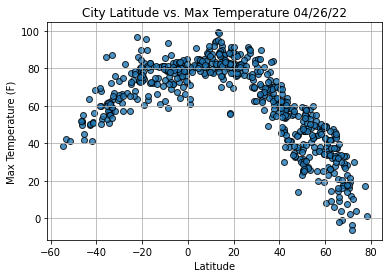

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

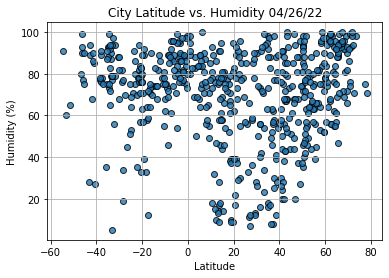

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

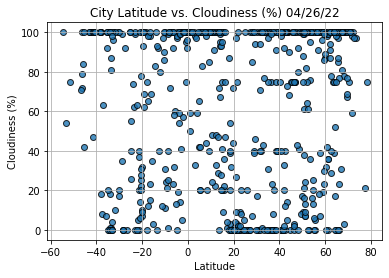

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

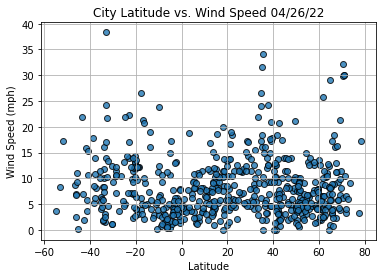

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    77.34
Humidity                       64
Cloudiness                     26
Wind Speed                   4.99
Country                        BR
Date          2022-04-26 19:03:21
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.7506,-68.5145,5.70,55,39,11.01,CA,2022-04-26 19:03:17
2,Tuktoyaktuk,69.4541,-133.0374,28.60,90,100,3.89,CA,2022-04-26 19:03:17
5,Hambantota,6.1241,81.1185,80.94,100,83,2.30,LK,2022-04-26 19:03:18
6,Jamestown,42.0970,-79.2353,46.02,56,100,13.80,US,2022-04-26 19:03:19
10,Biloxi,30.3960,-88.8853,80.60,90,100,11.36,US,2022-04-26 18:58:55


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

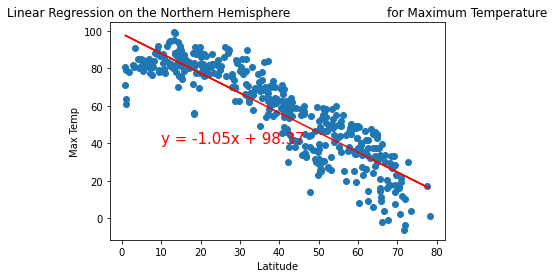

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

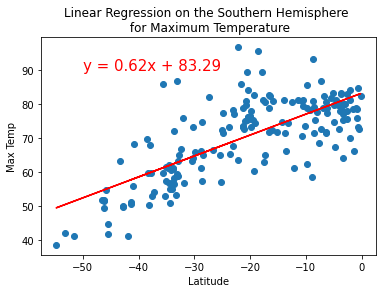

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

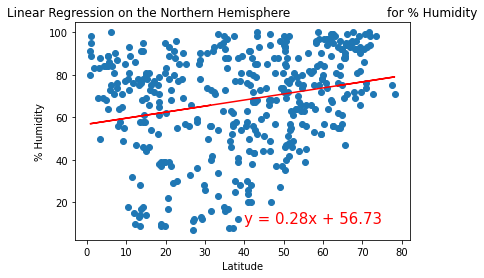

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

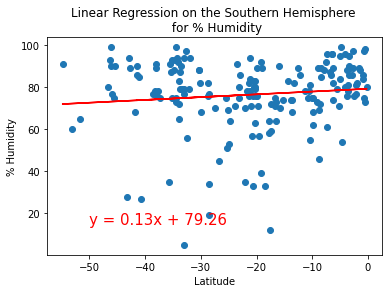

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

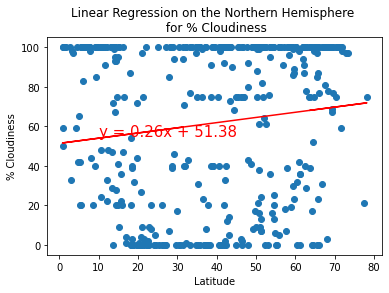

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

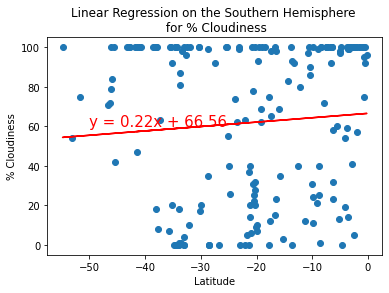

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))